In [28]:
# Task 1,2
import pandas as pd
df = pd.read_csv("lab2_data.csv",sep=";",parse_dates=["data"],dayfirst=True)

In [29]:
df.dtypes

data    datetime64[ns]
USD            float64
CAD            float64
EUR            float64
dtype: object

In [30]:
df.head()

,data,USD,CAD,EUR
0,2024-10-15,96.1021,69.8366,105.4854
1,2024-10-12,96.0686,69.8478,105.1095
2,2024-10-11,97.2394,71.0295,106.5074
3,2024-10-10,96.9483,70.9880,106.4175
4,2024-10-09,96.1079,70.6208,105.6891


In [31]:
#!pip install statsmodels matplotlib scikit-learn

In [32]:
# Task 3
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()

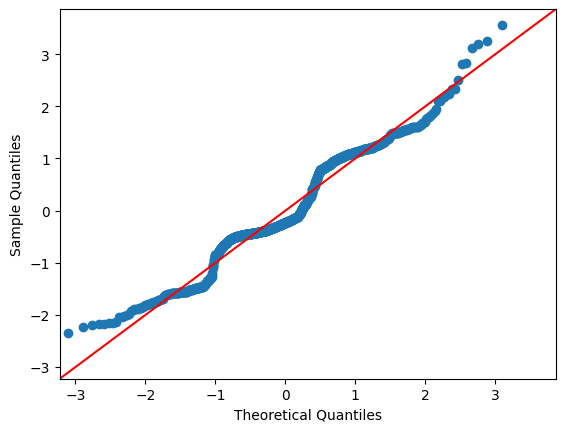

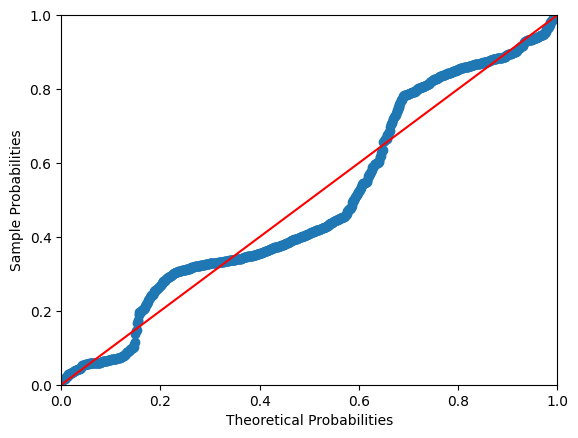

In [33]:

x = scaler.fit_transform(df[["USD"]])
df["USD"] = x[0:]
probplot_usd = sm.ProbPlot(df["USD"])
probplot_usd.qqplot(line="45")
probplot_usd.ppplot(line="45")
plt.show()



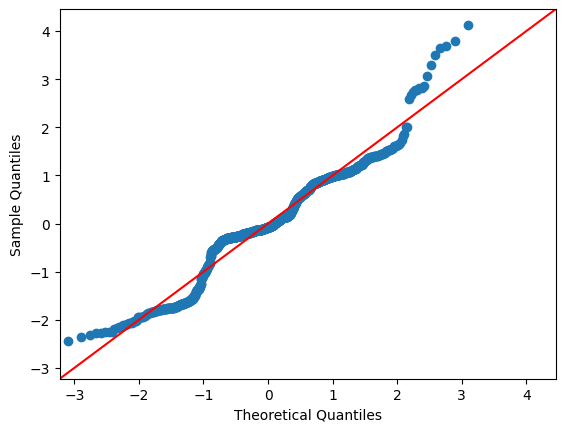

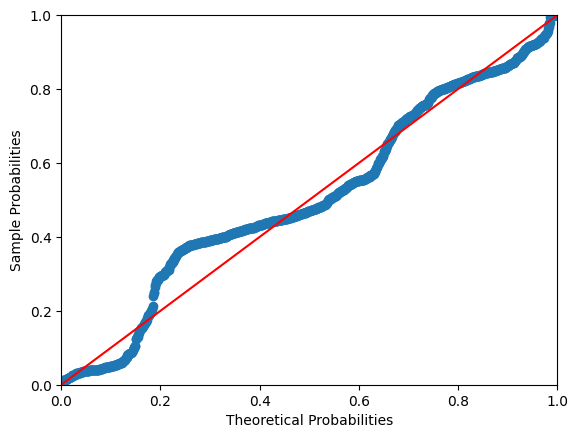

In [34]:
x = scaler.fit_transform(df[["CAD"]])
df["CAD"] = x[0:]
probplot_cad = sm.ProbPlot(df["CAD"])
probplot_cad.qqplot(line="45")
probplot_cad.ppplot(line="45")
plt.show()

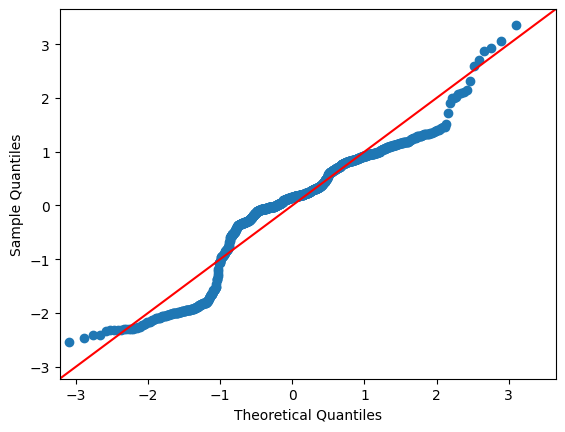

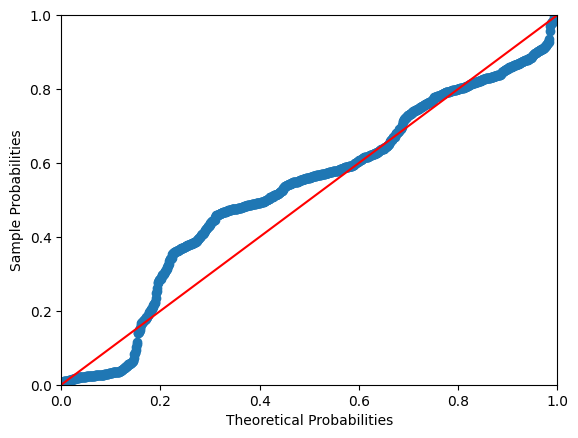

In [35]:
x = scaler.fit_transform(df[["EUR"]])
df["EUR"] = x[0:]
probplot_eur = sm.ProbPlot(df["EUR"])
probplot_eur.qqplot(line="45")
probplot_eur.ppplot(line="45")
plt.show()

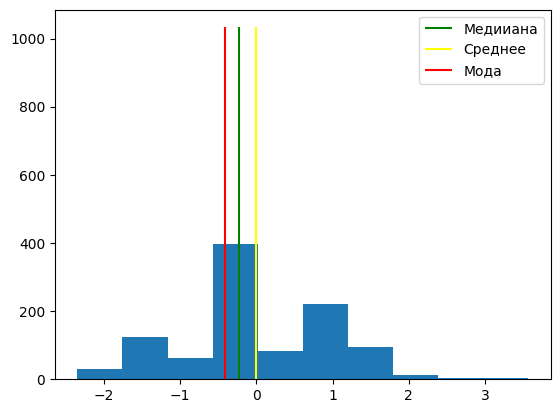

In [36]:
# TASK 4
plt.hist(df["USD"])
plt.vlines(df["USD"].median(),0,df["USD"].size,color="green",label="Медииана")
plt.vlines(df["USD"].mean(),0,df["USD"].size,color="yellow",label="Среднее")
plt.vlines(df["USD"].mode()[0],0,df["USD"].size,color="red",label="Мода")
plt.legend()

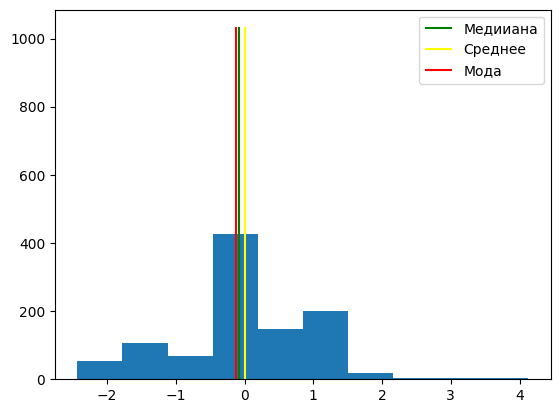

In [37]:
plt.hist(df["CAD"])
plt.vlines(df["CAD"].median(),0,df["CAD"].size,color="green",label="Медииана")
plt.vlines(df["CAD"].mean(),0,df["CAD"].size,color="yellow",label="Среднее")
plt.vlines(df["CAD"].mode()[0],0,df["CAD"].size,color="red",label="Мода")
plt.legend()

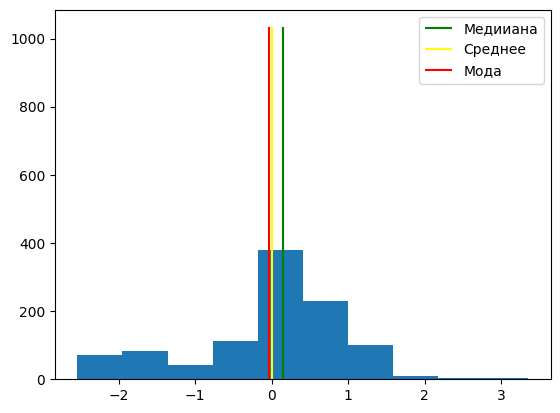

In [38]:
plt.hist(df["EUR"])
plt.vlines(df["EUR"].median(),0,df["EUR"].size,color="green",label="Медииана")
plt.vlines(df["EUR"].mean(),0,df["EUR"].size,color="yellow",label="Среднее")
plt.vlines(df["EUR"].mode()[0],0,df["EUR"].size,color="red",label="Мода")
plt.legend()

# Task 5

Выбор критерия нормальности делается в зависимости от выборки:
    7-2000 наблюдений – критерий Шапиро-Уилка 
    > 2000 наблюдений – подходят методы на основе эмпирической функции 
распределения (EDF):
- для большого числа отклонений в хвостах – критерий Андерсона-Дарлинга;
- для большого числа отклонений в середине – критерий Колмогорова-Смирнова

In [39]:
df["USD"].size

1033

In [13]:
# Применяем критерий Шапиро-Уилка
from scipy.stats import shapiro,norm
w_usd = shapiro(df["USD"])
w_cad = shapiro(df["CAD"])
w_eur = shapiro(df["EUR"])
print(f"USD : p-value= {w_usd[1]}")
print(f"CAD : p-value= {w_cad[1]}")
print(f"EUR : p-value= {w_eur[1]}")
# p-value мало везде, ни одно из распределений не является нормальнымa

USD : p-value= 2.850434538960153e-15
CAD : p-value= 1.854371715451316e-16
EUR : p-value= 2.842452986315541e-22


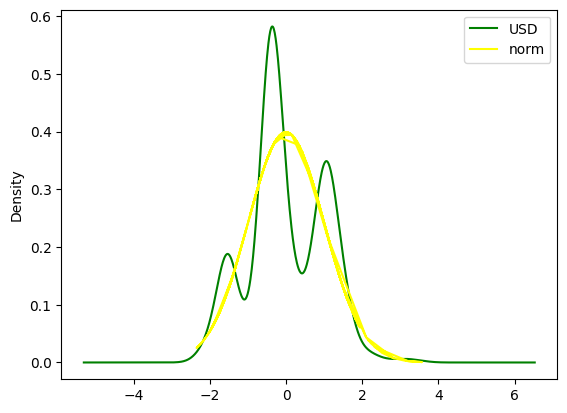

In [14]:
#df["CAD"].plot.kde(color="red",label="CAD")
df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["USD"],norm.pdf(df["USD"],df["USD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

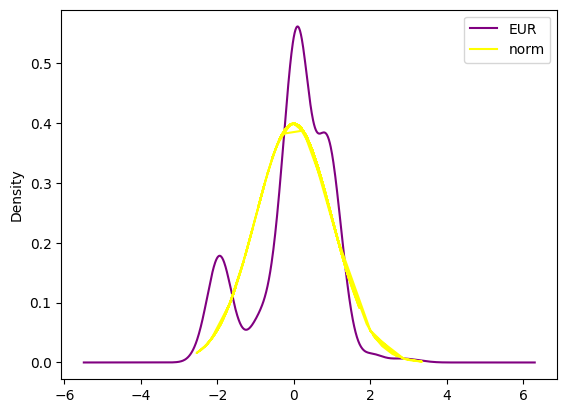

In [15]:
#df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["EUR"],norm.pdf(df["EUR"],df["EUR"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

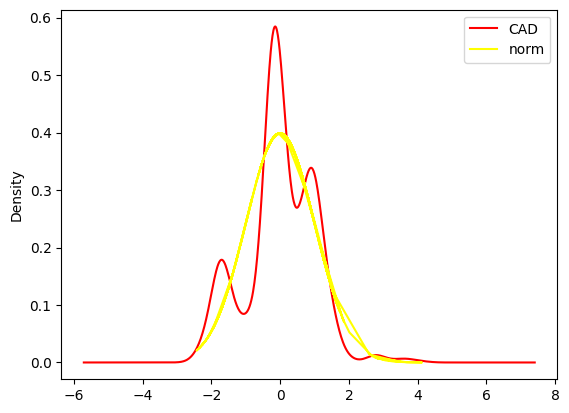

In [16]:
df["CAD"].plot.kde(color="red",label="CAD")
#df["USD"].plot.kde(color="green",label="USD")
#df["EUR"].plot.kde(color="purple",label="EUR")
plt.plot(df["CAD"],norm.pdf(df["CAD"],df["CAD"].mean(),1),
        color = "yellow", label="norm")
plt.legend()

<Axes: >

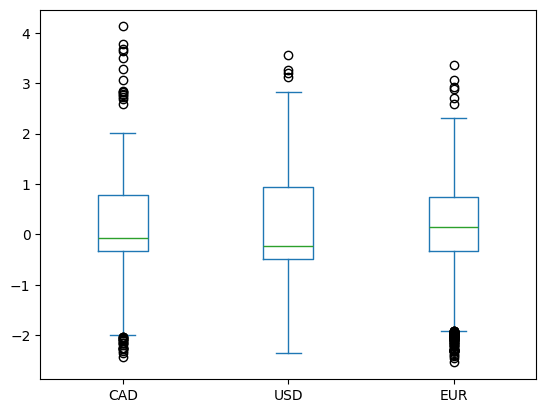

In [17]:
# TASK 6
df[["CAD","USD","EUR"]].plot.box()

In [18]:
x = df[df["CAD"] > df["CAD"].quantile(0.25)]
cad_filtered = x[x["CAD"] < x["CAD"].quantile(0.75)]


y = df[df["USD"] > df["USD"].quantile(0.25)]
usd_filtered = y[y["USD"] < y["USD"].quantile(0.75)]

z = df[df["EUR"] > df["EUR"].quantile(0.25)]
eur_filtered = z[z["EUR"] < z["EUR"].quantile(0.75)]



In [19]:
shapiro(usd_filtered["USD"])

ShapiroResult(statistic=np.float64(0.8256304330482774), pvalue=np.float64(1.2586107836053749e-24))

In [20]:
shapiro(eur_filtered["EUR"])

ShapiroResult(statistic=np.float64(0.9434363920837884), pvalue=np.float64(4.5772815510741116e-14))

In [21]:
shapiro(cad_filtered["CAD"])

ShapiroResult(statistic=np.float64(0.8655516715608329), pvalue=np.float64(6.633379639144143e-22))

<Axes: >

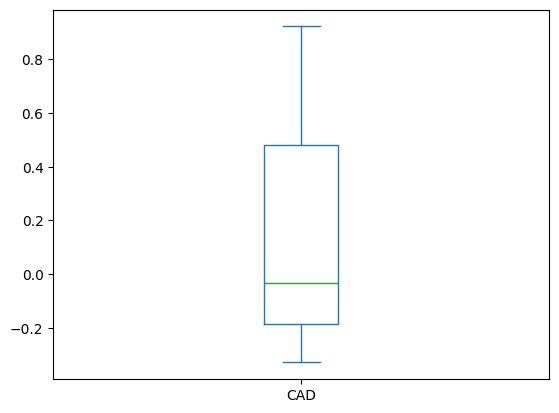

In [22]:
cad_filtered["CAD"].plot.box()

<Axes: >

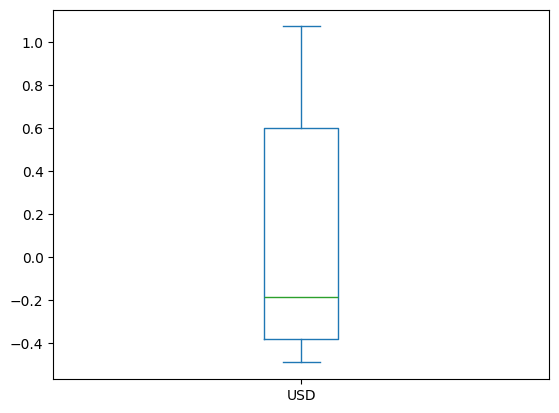

In [23]:
usd_filtered["USD"].plot.box()

<Axes: >

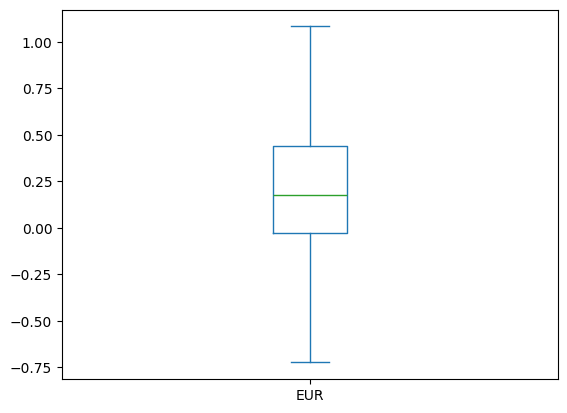

In [24]:
usd_filtered["EUR"].plot.box()

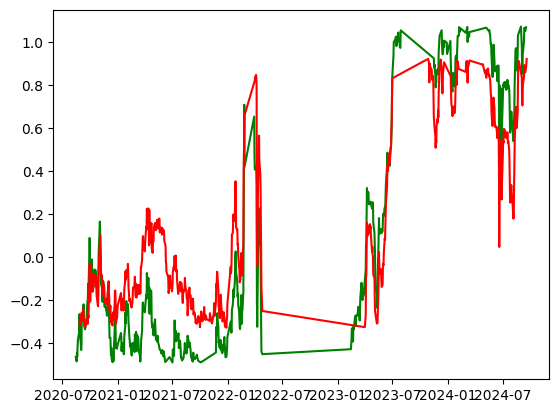

In [49]:
# TASK 7
plt.plot(usd_filtered["data"],usd_filtered["USD"], color="green")
plt.plot(cad_filtered["data"],cad_filtered["CAD"], color="red")

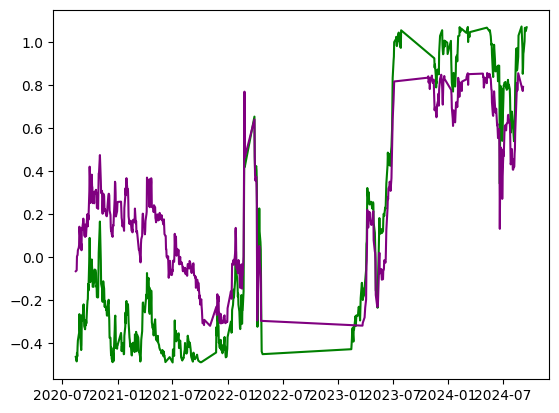

In [50]:
# TASK 7
plt.plot(usd_filtered["data"],usd_filtered["USD"], color="green")
plt.plot(eur_filtered["data"],eur_filtered["EUR"], color="purple")

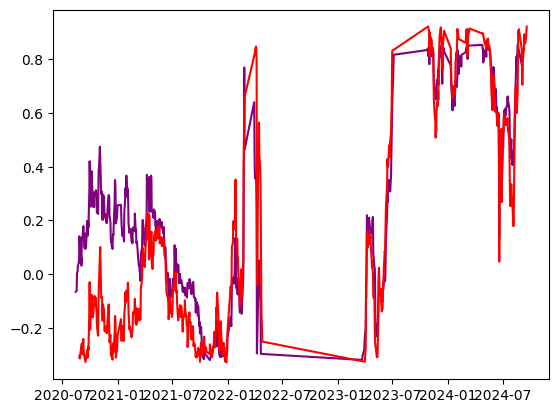

In [51]:
# TASK 7
plt.plot(eur_filtered["data"],eur_filtered["EUR"], color="purple")
plt.plot(cad_filtered["data"],cad_filtered["CAD"], color="red")

In [52]:
#Task 8
from scipy.stats import pearsonr,spearmanr,kendalltau

In [58]:
pr1 = pearsonr(usd_filtered["USD"],cad_filtered["CAD"])
sp1 = spearmanr(usd_filtered["USD"],cad_filtered["CAD"])
k1 = kendalltau(usd_filtered["USD"],cad_filtered["CAD"])
print(pr1)
print(sp1)
print(k1)

PearsonRResult(statistic=np.float64(0.8555171158976819), pvalue=np.float64(2.299327454380664e-167))
SignificanceResult(statistic=np.float64(0.7184498296719304), pvalue=np.float64(3.4663239995435617e-93))
SignificanceResult(statistic=np.float64(0.5251014689571458), pvalue=np.float64(9.095792509375911e-80))


In [59]:
pr2 = pearsonr(usd_filtered["USD"],eur_filtered["EUR"])
sp2 = spearmanr(usd_filtered["USD"],eur_filtered["EUR"])
k2 = kendalltau(usd_filtered["USD"],eur_filtered["EUR"])
print(pr2)
print(sp2)
print(k2)

PearsonRResult(statistic=np.float64(0.7906656737012747), pvalue=np.float64(2.9270511382254323e-125))
SignificanceResult(statistic=np.float64(0.6559671591939847), pvalue=np.float64(1.2196604327207867e-72))
SignificanceResult(statistic=np.float64(0.4859491925683439), pvalue=np.float64(1.3872657081080087e-68))


In [60]:
pr3 = pearsonr(usd_filtered["EUR"],cad_filtered["CAD"])
sp3 = spearmanr(usd_filtered["EUR"],cad_filtered["CAD"])
k3 = kendalltau(usd_filtered["EUR"],cad_filtered["CAD"])
print(pr3)
print(sp3)
print(k3)

PearsonRResult(statistic=np.float64(0.6858452172504534), pvalue=np.float64(8.101403251153379e-82))
SignificanceResult(statistic=np.float64(0.627250212444007), pvalue=np.float64(9.378512209990598e-65))
SignificanceResult(statistic=np.float64(0.45918461543246375), pvalue=np.float64(1.9576573865840316e-61))
